<a href="https://colab.research.google.com/github/Vedika1102/Breast-cancer-classification/blob/main/DS_Breast_cancer_classification_using_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset given here is about the patients who were detected with 2 kinds of breast cancer : a) Malignant or b) Benign

The features given here are the characteristics of the cell nuclei computed from the fine needle aspirate(FNA) of a breast mass.

Ten real-valued features are computed for each cell nucleus as follows:

radius (mean of distances from center to points on the perimeter)

texture (standard deviation of gray-scale values)

perimeter

area

smoothness (local variation in radius lengths)

compactness (perimeter^2 / area - 1.0)

concavity (severity of concave portions of the contour)

concave points (number of concave portions of the contour)

symmetry

fractal dimension ("coastline approximation" - 1)

Mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.

In [ ]:
# Importing Libraries:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Reading the file
data = pd.read_csv('BC.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


I: Data Wrangling -

I-a. Doing spot check on the data:

In [ ]:
# Overall view of the data:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Target Variable:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

I-b. Summary of Numeric Columns:

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


There are no null values

id and Unnamed: 32 are not required columns. So we will get rid of those.

There are two outcomes - Benign Tumor (which spreads locally) Malignant Tumor (which can spread throughout the whole body via blood)

I-c. Some operations:

In [ ]:
# Dropping some of the unwanted variables:
data.drop('Unnamed: 32',axis=1,inplace=True)


In [ ]:
data.drop('id',axis=1,inplace=True)

In [ ]:
# Binarizing the target variable:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

Important: 
The data is highly variable and any feature with low variance will be neglected. We will scale the data to allow more predictive power.
** Here we are standardizing the dataset - meaning shifting the distribution to have mean of zero and standard deviation of unit variance **

In [ ]:
datas = pd.DataFrame(preprocessing.scale(data.iloc[:,1:32]))
datas.columns = list(data.iloc[:,1:32].columns)
datas['diagnosis'] = data['diagnosis']

EDA:

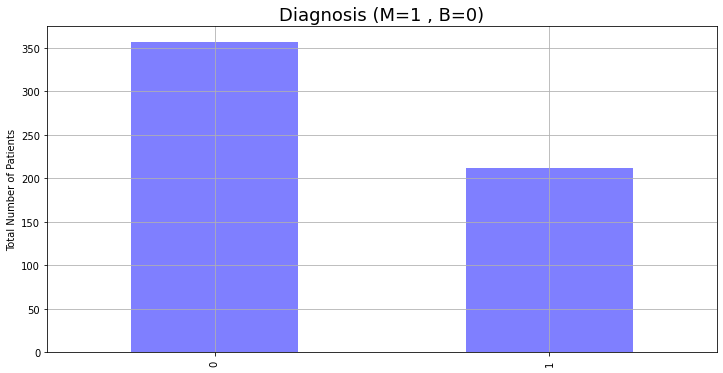

In [ ]:
#Looking at the number of patients with Malignant and Benign Tumors:
datas.diagnosis.value_counts().plot(kind='bar', alpha = 0.5, facecolor = 'b', figsize=(12,6))
plt.title("Diagnosis (M=1 , B=0)", fontsize = '18')
plt.ylabel("Total Number of Patients")
plt.grid(b=True)

~ 65% of the patients had Benign tumor while the rest of them had Malignant.

Considering only mean features of nucleus

In [ ]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
data_mean = data[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

We will just see how these features coorelate with the diagnosis using heatmap:

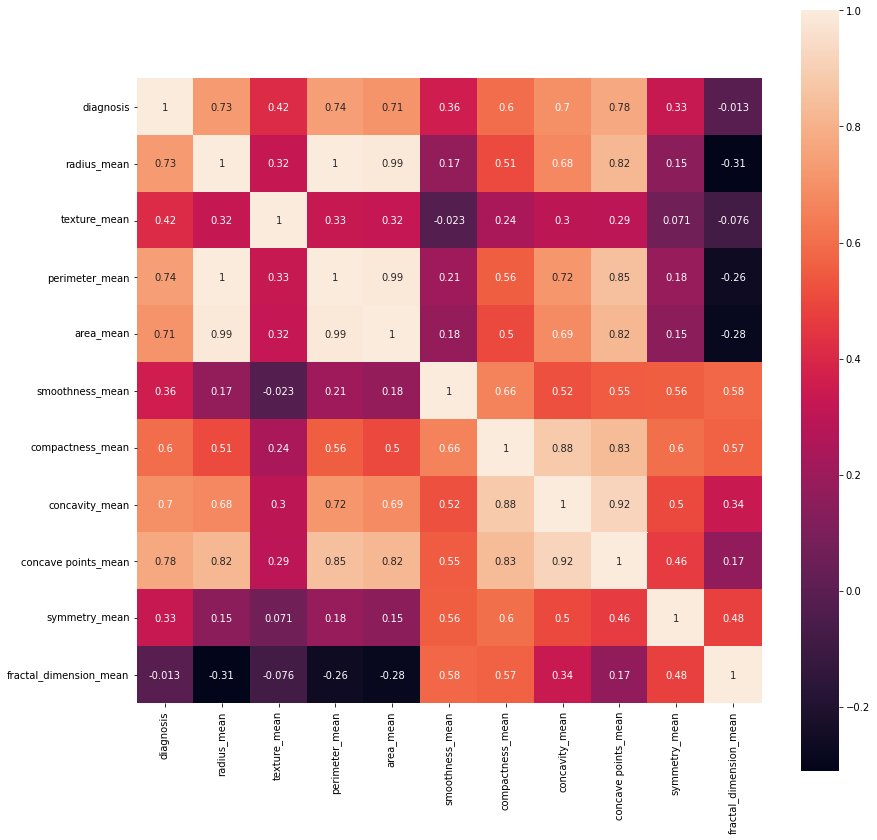

In [ ]:
plt.figure(figsize=(14,14))
foo = sns.heatmap(data_mean.corr(), vmax=1, square=True, annot=True)

radius_mean, perimeter_mean, area_mean, compactness_mean, concavity_mean, concave points_mean show high coorelation with the diagnosis.
The other variables do not really show high impact over diagnoses.

Bivariate Exploration:

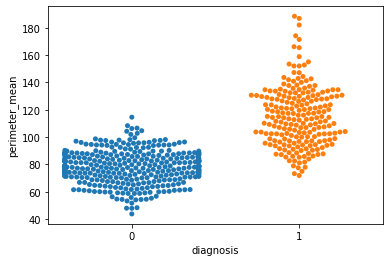

In [ ]:
_ = sns.swarmplot(y='perimeter_mean',x='diagnosis', data=data_mean)
plt.show()

Setting up the train and test data:

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics

predictors = data_mean.columns[2:11]
target = "diagnosis"

X = data_mean.loc[:,predictors]
y = np.ravel(data.loc[:,[target]])

# Split the dataset in train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print ('Shape of training set : %i || Shape of test set : %i' % (X_train.shape[0],X_test.shape[0]) )
print ('The dataset is very small so simple cross-validation approach should work here')
print ('There are very few data points so 10-fold cross validation should give us a better estimate')

Shape of training set : 455 || Shape of test set : 114
The dataset is very small so simple cross-validation approach should work here
There are very few data points so 10-fold cross validation should give us a better estimate


Logistic Regression Model:

This technique is widely used in medical field where dealing with binary classification problems.

Firstly we will run over all the mean features against our target feature.

We will use the features for our model based on the features that showed correlation in our heatmap.

In [ ]:
# Importing the model:
from sklearn.linear_model import LogisticRegression

# Initiating the model:
lr = LogisticRegression()

scores = cross_val_score(lr, X_train, y_train, scoring='accuracy' ,cv=10).mean()

print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

The mean accuracy with 10 fold cross validation is 91.0


SVM:

In [ ]:
# Importing the model:
from sklearn import svm

# Initiating the model:
svm = svm.SVC()

scores = cross_val_score(svm, X_train, y_train, scoring='accuracy' ,cv=10).mean()

print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

The mean accuracy with 10 fold cross validation is 86.83


We will try to hyper tune the parameters and try to fit with other kernels.

KNN:

In [ ]:
# Importing the model:
from sklearn.neighbors import KNeighborsClassifier

# Initiating the model:
knn = KNeighborsClassifier()

scores = cross_val_score(knn, X_train, y_train, scoring='accuracy' ,cv=10).mean()

print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

The mean accuracy with 10 fold cross validation is 88.37


Perceptron:
Perceptron is binary linear classification algortithm that purely decides based on the input (vector of numbers) if it belongs to specific class or not

In [ ]:
# Importing the model:
from sklearn.linear_model import Perceptron

# Initiating the model:
pct = Perceptron()

scores = cross_val_score(pct, X_train, y_train, scoring='accuracy' ,cv=10).mean()

print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

The mean accuracy with 10 fold cross validation is 75.35


Random Forest Model:

In [ ]:
# Importing the model:
from sklearn.ensemble import RandomForestClassifier

# Initiating the model:
rf = RandomForestClassifier()

scores = cross_val_score(rf, X_train, y_train, scoring='accuracy' ,cv=10).mean()

print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

The mean accuracy with 10 fold cross validation is 93.42


Naive Bayes:

In [ ]:
# Importing the model:
from sklearn.naive_bayes import GaussianNB

# Initiating the model:
nb = GaussianNB()

scores = cross_val_score(rf, X_train, y_train, scoring='accuracy' ,cv=10).mean()

print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

The mean accuracy with 10 fold cross validation is 93.86


Logisitic Regression, Random Forest, Naive Bayes and kNN looks to perform better. 

Lets try to fine tune the parameters and see if we can get any improvisation.

Starting with k-Nearest Neighbors:
The default neighbors is 20. However, lets try running kNN for different values of neighbors:

In [ ]:
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn, X_train, y_train, scoring='accuracy' ,cv=10).mean()
    print("N = " + str(i) + " :: Score = " + str(round(score,2)))

N = 1 :: Score = 0.87
N = 2 :: Score = 0.87
N = 3 :: Score = 0.88
N = 4 :: Score = 0.89
N = 5 :: Score = 0.88
N = 6 :: Score = 0.89
N = 7 :: Score = 0.89
N = 8 :: Score = 0.88
N = 9 :: Score = 0.87
N = 10 :: Score = 0.88
N = 11 :: Score = 0.87
N = 12 :: Score = 0.88
N = 13 :: Score = 0.88
N = 14 :: Score = 0.87
N = 15 :: Score = 0.88
N = 16 :: Score = 0.88
N = 17 :: Score = 0.88
N = 18 :: Score = 0.88
N = 19 :: Score = 0.88
N = 20 :: Score = 0.88


The default number of trees is 10. However, lets try running Random Forest for different values of trees:

In [ ]:
for i in range(1, 21):
    rf = RandomForestClassifier(n_estimators = i)
    score = cross_val_score(rf, X_train, y_train, scoring='accuracy' ,cv=10).mean()
    print("N = " + str(i) + " :: Score = " + str(round(score,2)))

N = 1 :: Score = 0.9
N = 2 :: Score = 0.9
N = 3 :: Score = 0.91
N = 4 :: Score = 0.92
N = 5 :: Score = 0.93
N = 6 :: Score = 0.93
N = 7 :: Score = 0.94
N = 8 :: Score = 0.94
N = 9 :: Score = 0.94
N = 10 :: Score = 0.95
N = 11 :: Score = 0.93
N = 12 :: Score = 0.94
N = 13 :: Score = 0.93
N = 14 :: Score = 0.94
N = 15 :: Score = 0.93
N = 16 :: Score = 0.94
N = 17 :: Score = 0.93
N = 18 :: Score = 0.95
N = 19 :: Score = 0.93
N = 20 :: Score = 0.95


It looks like trees with 18 should give a reasonable estimate of the test data. Let us trying using Random Forest and Naive Bayes on our test dataset and finalize our model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initiating the model:
rf = RandomForestClassifier(n_estimators=18)

rf = rf.fit(X_train, y_train)

predicted = rf.predict(X_test)

acc_test = metrics.accuracy_score(y_test, predicted)

print ('The accuracy on test data is %s' % (round(acc_test,2)))

The accuracy on test data is 0.98


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initiating the model:
nb = GaussianNB()

nb = nb.fit(X_train, y_train)

predicted = nb.predict(X_test)

acc_test = metrics.accuracy_score(y_test, predicted)

print ('The accuracy on test data is %s' % (acc_test))

The accuracy on test data is 0.8947368421052632
